In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from itertools import permutations

warnings.filterwarnings('ignore')


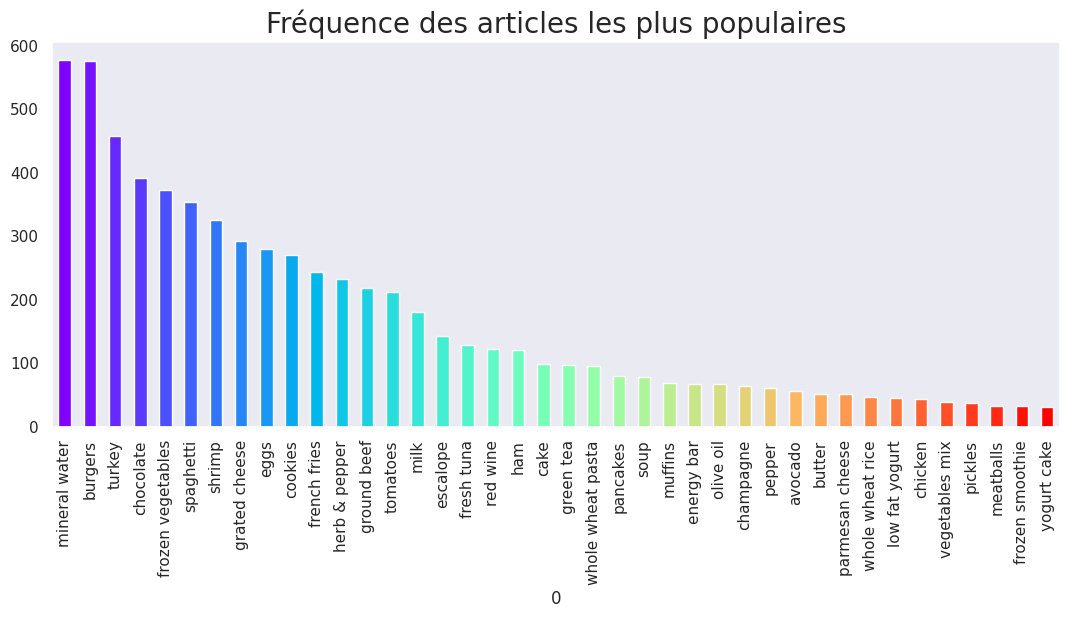

In [7]:

# setup seaborn && pandas
sns.set(style='darkgrid', color_codes=True)
pd.set_option('display.max_columns', 75)

data = pd.read_csv('./market_basket_opti.csv', header=None)

# EDA
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13, 5))
plt.title('Fréquence des articles les plus populaires', fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()


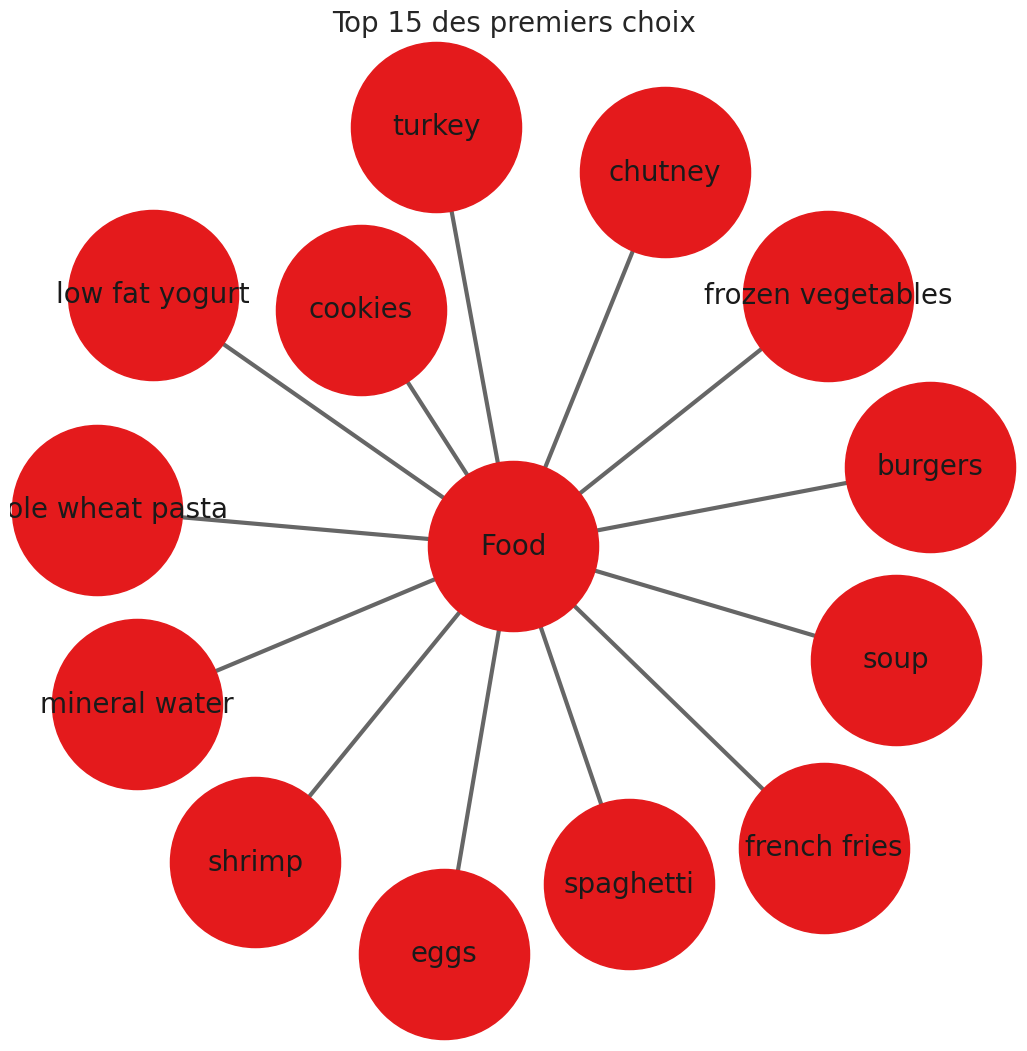

In [8]:

data['food'] = 'Food'
food = data.truncate(before=-1, after=15)
food = nx.from_pandas_edgelist(food, source='food', target=0, edge_attr=True)

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))

nx.draw_networkx_nodes(food, pos, node_size=15000, node_color=color)
nx.draw_networkx_edges(food, pos, width=3, alpha=0.6, edge_color='black')
nx.draw_networkx_labels(food, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.grid()
plt.title('Top 15 des premiers choix', fontsize=20)
plt.show()



In [9]:

# get transactions from dataset
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i, j]) for j in range(0, len(data.columns))])
    
# extract unique items
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

if 'nan' in items: items.remove('nan')

# compute rules
rules = list(permutations(items, 2))

print()
print(' > rules ')
print(rules)
print()



 > rules 
[('cream', 'yams'), ('cream', 'flax seed'), ('cream', 'champagne'), ('cream', 'tea'), ('cream', 'antioxydant juice'), ('cream', 'cottage cheese'), ('cream', 'nonfat milk'), ('cream', 'grated cheese'), ('cream', 'fresh bread'), ('cream', 'green beans'), ('cream', 'green tea'), ('cream', 'cereals'), ('cream', 'butter'), ('cream', 'french fries'), ('cream', 'salad'), ('cream', 'pepper'), ('cream', 'light cream'), ('cream', 'honey'), ('cream', 'chocolate'), ('cream', 'babies food'), ('cream', 'almonds'), ('cream', 'zucchini'), ('cream', 'turkey'), ('cream', 'chicken'), ('cream', 'carrots'), ('cream', 'bug spray'), ('cream', 'protein bar'), ('cream', 'escalope'), ('cream', 'red wine'), ('cream', 'pasta'), ('cream', 'cauliflower'), ('cream', 'meatballs'), ('cream', 'brownies'), ('cream', 'whole wheat pasta'), ('cream', 'magazines'), ('cream', 'shallot'), ('cream', 'burger sauce'), ('cream', 'energy drink'), ('cream', 'mushroom cream sauce'), ('cream', 'ground beef'), ('cream', 'as